# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

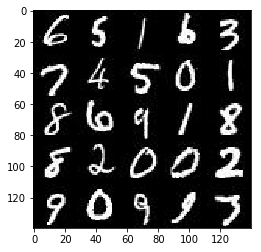

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

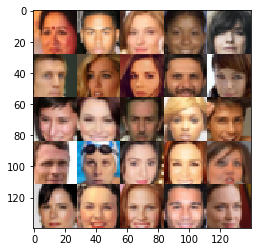

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    image = tf.placeholder(tf.float32,[None, image_width, image_height, image_channels],name='input_real')
    Z = tf.placeholder(tf.float32, [None, z_dim],name='input_z')
    l_rate = tf.placeholder(tf.float32)

    return image, Z, l_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # input image is 28*28*3
        x1 = tf.layers.conv2d(images, 128, 5, strides=1,padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer())
        relu1 = tf.maximum(alpha * x1, x1)
        # 28*28*128
        
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 14*14*256
         
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=1, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 14*14*512
        
        x4 = tf.layers.conv2d(relu3, 1024, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer())
        bn4 = tf.layers.batch_normalization(x4, training=True)
        relu5 = tf.maximum(alpha * bn4, bn4)
        # 7*7*1024
        
        # dropout
        dropout = tf.nn.dropout(relu5, 0.8)
        
        #leaky Relu
        flat = tf.reshape(dropout, (-1, 7*7*1024))
        logits = tf.layers.dense(flat,1,activation=None)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope('generator',reuse= not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*1024)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 1024))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x1024 now
        
        x2 = tf.layers.conv2d_transpose(x1, 512, 5, strides=1, padding='same',
                                       kernel_initializer = tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 7x7x512 now
        
        x3 = tf.layers.conv2d_transpose(x2, 512, 5, strides=2, padding='same',
                                       kernel_initializer = tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 14x14x512 now
        
        x4 = tf.layers.conv2d_transpose(x3, 256, 5, strides=1, padding='same',
                                       kernel_initializer = tf.contrib.layers.xavier_initializer())
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        # 14x14x256
        
        x5 = tf.layers.conv2d_transpose(x4, 128, 5, strides=1, padding='same',
                                       kernel_initializer = tf.contrib.layers.xavier_initializer())
        x5 = tf.layers.batch_normalization(x5, training=is_train)
        x5 = tf.maximum(alpha * x5, x5)
        # 14x14x128
        
        x6 = tf.layers.conv2d_transpose(x5, 64, 5, strides=1, padding='same',
                                       kernel_initializer = tf.contrib.layers.xavier_initializer())
        x6 = tf.layers.batch_normalization(x6, training=is_train)
        x6 = tf.maximum(alpha * x6, x6)
        # 14x14x64
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x6, out_channel_dim, 5, strides=2, padding='same',
                                           kernel_initializer = tf.contrib.layers.xavier_initializer())
        # 28x28x3 now
        
        # dropout
        dropout = tf.nn.dropout(logits, 0.5)
        
        out = tf.tanh(logits)
        
        return out 
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    alpha = 0.2
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
import sklearn.preprocessing
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    class GAN:
        def __init__(self, data_shape, z_dim, learning_rate):
        
            self.input_real, self.input_z, l_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
        
            self.d_loss, self.g_loss = model_loss(self.input_real, self.input_z,
                                              data_shape[3])
        
            self.d_opt, self.g_opt = model_opt(self.d_loss, self.g_loss, learning_rate, beta1)
    

    net = GAN(data_shape, z_dim, learning_rate)

    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps = steps + 1
                #print(batch_images.shape)
                
                # normalize
                for i in range(batch_images.shape[0]):
                    for j in range(batch_images.shape[3]):
                            batch_images[i,:,:,j] = sklearn.preprocessing.normalize(batch_images[i,:,:,j])
                    
                
                # TODO: Train Model
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(net.d_opt, feed_dict={net.input_real: batch_images, net.input_z: batch_z})
                _ = sess.run(net.g_opt, feed_dict={net.input_z: batch_z, net.input_real: batch_images})
                
                _ = sess.run(net.g_opt, feed_dict={net.input_z: batch_z, net.input_real: batch_images})
                
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = net.d_loss.eval({net.input_z: batch_z, net.input_real: batch_images})
                    train_loss_g = net.g_loss.eval({net.input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    

                if steps % 100 == 0:
                    show_generator_output(sess, 25, net.input_z, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.0061... Generator Loss: 14.1507
Epoch 1/2... Discriminator Loss: 2.5167... Generator Loss: 4.4887
Epoch 1/2... Discriminator Loss: 0.6787... Generator Loss: 1.7479
Epoch 1/2... Discriminator Loss: 0.4408... Generator Loss: 3.6896
Epoch 1/2... Discriminator Loss: 0.6876... Generator Loss: 9.0307
Epoch 1/2... Discriminator Loss: 0.1130... Generator Loss: 3.2697
Epoch 1/2... Discriminator Loss: 1.3589... Generator Loss: 1.0194
Epoch 1/2... Discriminator Loss: 0.7046... Generator Loss: 1.9882
Epoch 1/2... Discriminator Loss: 0.0350... Generator Loss: 6.3411
Epoch 1/2... Discriminator Loss: 0.9311... Generator Loss: 1.1500


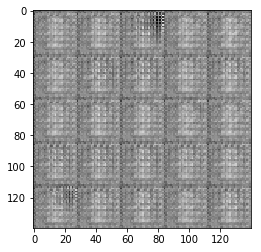

Epoch 1/2... Discriminator Loss: 0.0180... Generator Loss: 6.0915
Epoch 1/2... Discriminator Loss: 0.0472... Generator Loss: 3.8332
Epoch 1/2... Discriminator Loss: 0.0088... Generator Loss: 5.9811
Epoch 1/2... Discriminator Loss: 0.0012... Generator Loss: 8.2254
Epoch 1/2... Discriminator Loss: 0.0143... Generator Loss: 5.0160
Epoch 1/2... Discriminator Loss: 0.0041... Generator Loss: 6.6063
Epoch 1/2... Discriminator Loss: 0.0522... Generator Loss: 3.2701
Epoch 1/2... Discriminator Loss: 0.0147... Generator Loss: 4.8630
Epoch 1/2... Discriminator Loss: 0.0086... Generator Loss: 5.6177
Epoch 1/2... Discriminator Loss: 0.0188... Generator Loss: 4.3852


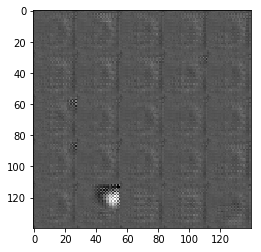

Epoch 1/2... Discriminator Loss: 0.0068... Generator Loss: 5.3745
Epoch 1/2... Discriminator Loss: 0.0030... Generator Loss: 6.2399
Epoch 1/2... Discriminator Loss: 0.0359... Generator Loss: 3.5596
Epoch 1/2... Discriminator Loss: 0.0046... Generator Loss: 5.7800
Epoch 1/2... Discriminator Loss: 0.0067... Generator Loss: 5.5221
Epoch 1/2... Discriminator Loss: 0.0069... Generator Loss: 5.3679
Epoch 1/2... Discriminator Loss: 0.0235... Generator Loss: 4.1952
Epoch 1/2... Discriminator Loss: 0.0068... Generator Loss: 5.4517
Epoch 1/2... Discriminator Loss: 0.0048... Generator Loss: 5.8198
Epoch 1/2... Discriminator Loss: 0.0008... Generator Loss: 7.4905


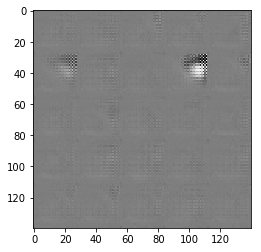

Epoch 1/2... Discriminator Loss: 0.0104... Generator Loss: 4.9153
Epoch 1/2... Discriminator Loss: 0.0118... Generator Loss: 4.5963
Epoch 1/2... Discriminator Loss: 0.0068... Generator Loss: 5.6166
Epoch 1/2... Discriminator Loss: 0.0119... Generator Loss: 4.8032
Epoch 1/2... Discriminator Loss: 0.0146... Generator Loss: 4.5573
Epoch 1/2... Discriminator Loss: 0.0019... Generator Loss: 6.6266
Epoch 1/2... Discriminator Loss: 0.0022... Generator Loss: 6.3766
Epoch 1/2... Discriminator Loss: 0.0062... Generator Loss: 5.1318
Epoch 1/2... Discriminator Loss: 0.0004... Generator Loss: 8.2941
Epoch 1/2... Discriminator Loss: 0.0023... Generator Loss: 6.6285


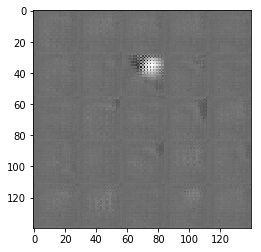

Epoch 1/2... Discriminator Loss: 0.0019... Generator Loss: 7.1014
Epoch 1/2... Discriminator Loss: 0.0041... Generator Loss: 6.7188
Epoch 1/2... Discriminator Loss: 0.0044... Generator Loss: 6.3081
Epoch 1/2... Discriminator Loss: 0.0029... Generator Loss: 6.3928
Epoch 1/2... Discriminator Loss: 0.0004... Generator Loss: 10.7234
Epoch 1/2... Discriminator Loss: 0.0008... Generator Loss: 10.2802
Epoch 1/2... Discriminator Loss: 4.7772... Generator Loss: 0.1337
Epoch 1/2... Discriminator Loss: 3.3051... Generator Loss: 0.1886
Epoch 1/2... Discriminator Loss: 0.0026... Generator Loss: 7.6589
Epoch 1/2... Discriminator Loss: 0.0119... Generator Loss: 7.3297


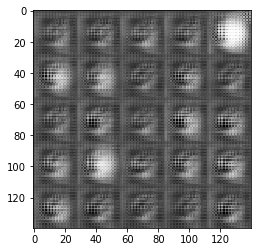

Epoch 1/2... Discriminator Loss: 17.7583... Generator Loss: 21.3657
Epoch 1/2... Discriminator Loss: 0.0904... Generator Loss: 4.4430
Epoch 1/2... Discriminator Loss: 0.0988... Generator Loss: 15.3175
Epoch 1/2... Discriminator Loss: 0.0007... Generator Loss: 10.8217
Epoch 1/2... Discriminator Loss: 0.1333... Generator Loss: 18.7875
Epoch 1/2... Discriminator Loss: 0.0107... Generator Loss: 10.2633
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 11.0422
Epoch 1/2... Discriminator Loss: 0.0083... Generator Loss: 7.9817
Epoch 1/2... Discriminator Loss: 0.3068... Generator Loss: 1.9656
Epoch 1/2... Discriminator Loss: 0.1906... Generator Loss: 2.6390


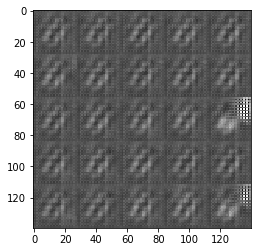

Epoch 1/2... Discriminator Loss: 0.1782... Generator Loss: 3.8362
Epoch 1/2... Discriminator Loss: 0.0103... Generator Loss: 6.8093
Epoch 1/2... Discriminator Loss: 0.0334... Generator Loss: 5.0849
Epoch 1/2... Discriminator Loss: 0.0149... Generator Loss: 5.1396
Epoch 1/2... Discriminator Loss: 0.0101... Generator Loss: 6.4463
Epoch 1/2... Discriminator Loss: 0.0595... Generator Loss: 3.8389
Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 11.5480
Epoch 1/2... Discriminator Loss: 0.0057... Generator Loss: 6.0790
Epoch 1/2... Discriminator Loss: 0.0100... Generator Loss: 5.8554
Epoch 1/2... Discriminator Loss: 0.0016... Generator Loss: 8.3597


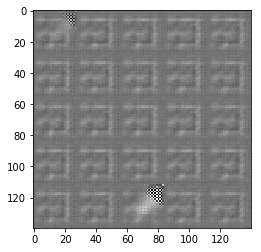

Epoch 1/2... Discriminator Loss: 0.0190... Generator Loss: 4.7946
Epoch 1/2... Discriminator Loss: 0.0430... Generator Loss: 3.9410
Epoch 1/2... Discriminator Loss: 0.0217... Generator Loss: 4.9214
Epoch 1/2... Discriminator Loss: 0.0128... Generator Loss: 5.3608
Epoch 1/2... Discriminator Loss: 0.0108... Generator Loss: 5.4783
Epoch 1/2... Discriminator Loss: 0.0011... Generator Loss: 7.9873
Epoch 1/2... Discriminator Loss: 0.0032... Generator Loss: 6.8295
Epoch 1/2... Discriminator Loss: 0.0052... Generator Loss: 7.6998
Epoch 1/2... Discriminator Loss: 0.0045... Generator Loss: 7.6009
Epoch 1/2... Discriminator Loss: 0.0014... Generator Loss: 7.2462


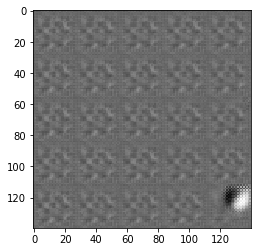

Epoch 1/2... Discriminator Loss: 0.0048... Generator Loss: 6.3261
Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 10.1163
Epoch 1/2... Discriminator Loss: 0.0074... Generator Loss: 5.8977
Epoch 1/2... Discriminator Loss: 0.0022... Generator Loss: 7.3568
Epoch 1/2... Discriminator Loss: 0.0051... Generator Loss: 6.1085
Epoch 1/2... Discriminator Loss: 0.0022... Generator Loss: 7.5764
Epoch 1/2... Discriminator Loss: 0.0062... Generator Loss: 5.7989
Epoch 1/2... Discriminator Loss: 0.0015... Generator Loss: 7.4675
Epoch 1/2... Discriminator Loss: 0.0024... Generator Loss: 7.1174
Epoch 1/2... Discriminator Loss: 0.0004... Generator Loss: 15.3929


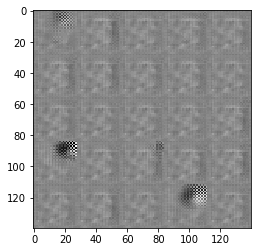

Epoch 1/2... Discriminator Loss: 0.0032... Generator Loss: 6.7342
Epoch 1/2... Discriminator Loss: 0.0037... Generator Loss: 6.5433
Epoch 1/2... Discriminator Loss: 0.0055... Generator Loss: 6.2464
Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 8.1804
Epoch 2/2... Discriminator Loss: 0.0044... Generator Loss: 6.3241
Epoch 2/2... Discriminator Loss: 0.0045... Generator Loss: 6.3707
Epoch 2/2... Discriminator Loss: 0.0021... Generator Loss: 7.1273
Epoch 2/2... Discriminator Loss: 0.0027... Generator Loss: 6.7976
Epoch 2/2... Discriminator Loss: 0.0022... Generator Loss: 6.9717
Epoch 2/2... Discriminator Loss: 0.0019... Generator Loss: 7.4617


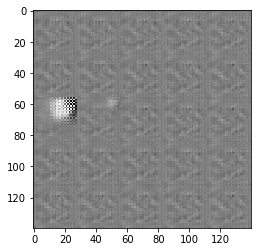

Epoch 2/2... Discriminator Loss: 0.0038... Generator Loss: 6.5038
Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 7.7689
Epoch 2/2... Discriminator Loss: 0.0027... Generator Loss: 6.6892
Epoch 2/2... Discriminator Loss: 0.0024... Generator Loss: 6.9053
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 8.8098
Epoch 2/2... Discriminator Loss: 0.0023... Generator Loss: 6.9979
Epoch 2/2... Discriminator Loss: 0.0016... Generator Loss: 7.5097
Epoch 2/2... Discriminator Loss: 0.0023... Generator Loss: 6.8900
Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 7.7852
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 7.7421


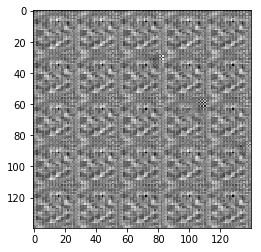

Epoch 2/2... Discriminator Loss: 0.0013... Generator Loss: 7.5000
Epoch 2/2... Discriminator Loss: 0.0028... Generator Loss: 6.9454
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 9.0869
Epoch 2/2... Discriminator Loss: 0.0022... Generator Loss: 7.1528
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 8.7784
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.7448
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.5856
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 8.8190
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 8.4596
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 8.2298


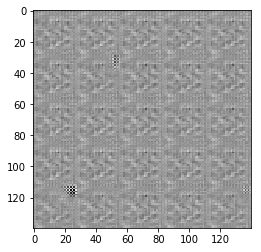

Epoch 2/2... Discriminator Loss: 0.0016... Generator Loss: 7.5136
Epoch 2/2... Discriminator Loss: 0.0018... Generator Loss: 7.2008
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.7741
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 8.7985
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 8.1092
Epoch 2/2... Discriminator Loss: 0.0015... Generator Loss: 7.2172
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 8.1105
Epoch 2/2... Discriminator Loss: 0.0013... Generator Loss: 7.4842
Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 7.5099
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 10.0332


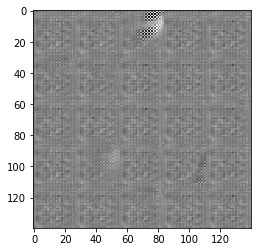

Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.4993
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 8.5272
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.7922
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.7629
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.7929
Epoch 2/2... Discriminator Loss: 0.0013... Generator Loss: 7.5468
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 7.7317
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 8.0082
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 9.3553
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.8923


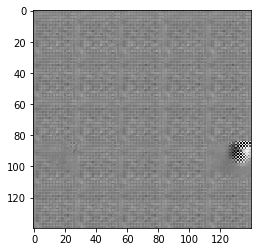

Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 7.8670
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 9.2790
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 8.0036
Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 7.8453
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 9.5523
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.9922
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.9171
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 8.0785
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 8.6641
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.8767


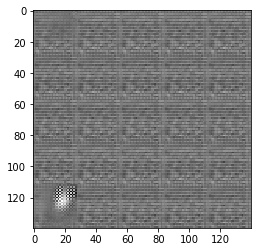

Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 8.0894
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 8.3990
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 8.5663
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 8.1203
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.9779
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 10.3488
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 11.7208
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 8.1843
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 8.6637
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.9891


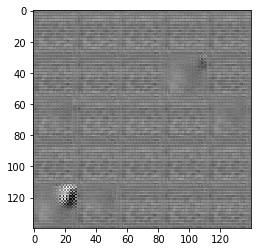

Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 8.6445
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 8.0127
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.7576
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 9.1817
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 12.3126
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 8.8916
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 8.8251
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 9.0115
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 8.7231
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 10.1317


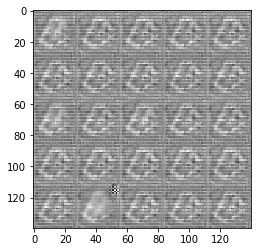

Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 10.9824
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 9.7422
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 12.4912
Epoch 2/2... Discriminator Loss: 0.0786... Generator Loss: 4.6661
Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 10.7020
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 9.8875
Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 9.5923
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 9.2072
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 9.4384
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 9.4782


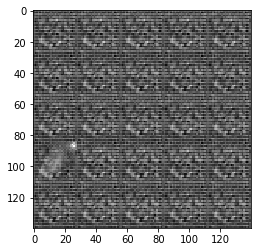

Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 9.4422
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 10.8149
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 10.3914
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 13.7459
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 9.9606
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 10.9414
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 11.9645


In [12]:
batch_size = 64
z_dim = 100
learning_rate =  0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)
        

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [13]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

(128, 28, 28, 3)


KeyboardInterrupt: 

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.